# Intoduction: 
## Method for Clustering: 

### k-means
#### validate the number of clusters: 
* ``Elbow method``
* ``silhouette scores``

### Fuzzy c-means
#### validate the number of clusters:
* ``silhouette scores``

### MiniBatchKmeans
#### validate the number of clusters:
* ``silhouette scores``

### Mixture Model Clustering
#### validate the number of clusters:
* ``silhouette scores``
* ``AIC`` & ``BIC`` 
* ``gradient BIC``

### Self-Organizing Maps


plot geomap see instruction here: [https://www.kaggle.com/alexisbcook/your-first-map](http://)

calculate other scores [https://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html?highlight=evaluation#sphx-glr-download-auto-examples-cluster-plot-adjusted-for-chance-measures-py](http://) and [https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation](http://)

homepage here, you can see other method chooice: [https://scikit-learn.org/stable/user_guide.html](http://)

## Method for Evaluation(no ground truth): 
* ``Elbow method``: run kmeans clustering for a range of values of k (eg. from 1 to k), and calculate **the sum of squared errors(SSE)** for each k. Then choose a small value of k that has a low SSE. 
* The Elbow method sometimes doesn't clearly represented( eg. a fairly smooth curve), especially when the data is not very clustered.  ``Silhouette scores``: a measure of how similar an object is to its own cluster compared to other clusters. range: (-1,+1), a **high value** indicates the object is well matched to its own cluster and poorly matched to neighboring clusters.  If **most objects** have a high value, then the clustering configuration is appropriate. (The silhouette can be calculated with any distance metric, such as the **Euclidean distance** or the **Manhattan distance**.)
* ``calinski_harabasz_score``: The score is higher when clusters are dense and well separated. The score is higher for **convex clusters** than other concepts of clusters. 
* ``davies_bouldin_score``: Signifies the average 'similarity' between clusters, which is **a measure that compares the distance between clusters with the size of the clusters themselves**. A lower Davies-Bouldin index relates to a model with better separation between the clusters. Zero is the lowest and the best. 

## Interpretation: 
### method 
* First: Find the most variate features. 
* Second: Cluster each feature individualy, then use the optimal cluster of the dataset as the ground truth to evaluate the cluster from individual feature to find the most consistent ones, by Jenks optimization method.  
>> Tools: **Evaluation with ground truth class** : 
>>>> ``adjusted_rand_score``: A fuction measures the similarity of the two assignments, ignoring permuations and with chance normalization. Perfect labeling is 1.0, bad (independent) labelings are negative or close to 0.0.  
>>>> ``adjusted_mutual_info_score``: A consensus measure. (``normalized_mutual_info_score`` for literature.) Perfect labeling is 1.0, bad (independent) labelings have negative or zero socre.
>>>> Metric using conditional entropy analysis: ``homogeneity_score``: Each cluster contains only members of a single class. ``completeness_score``: All members of a given class are assigned to the same cluster. ``v_measure_score``: harmonic mean. 

#### Jenks optimization method +  (choropleth) maps.
This is done by seeking to minimize each class's average deviation from the class mean, while maximizing each class's deviation from the means of the other groups. In other words, the method seeks to reduce the variance within classes and maximize the variance between classes.
* Only useful for 1-D, cannot be used formultivariable clustering.


In [1]:
!pip install --upgrade pip

     |████████████████████████████████| 1.5 MB 402 kB/s 
  Attempting uninstall: pip
    Found existing installation: pip 20.1.1
    Uninstalling pip-20.1.1:
      Successfully uninstalled pip-20.1.1


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from matplotlib import pyplot as plt
import seaborn as sns

/kaggle/input/cluster/normalized_data8-15.csv
/kaggle/input/cluster/normalized_data8-13.csv
/kaggle/input/cluster/pre_normed_data_8-1.csv
/kaggle/input/cluster/pre_normalized_data8-15.csv
/kaggle/input/cluster/pre_normalized_data8-13.csv
/kaggle/input/cluster/c_03mr20-20200801T185256Z-001/c_03mr20/c_03mr20.shx
/kaggle/input/cluster/c_03mr20-20200801T185256Z-001/c_03mr20/c_03mr20.shp
/kaggle/input/cluster/c_03mr20-20200801T185256Z-001/c_03mr20/c_03mr20.prj
/kaggle/input/cluster/c_03mr20-20200801T185256Z-001/c_03mr20/c_03mr20.dbf


In [3]:
normal_data = pd.read_csv("/kaggle/input/cluster/normalized_data8-15.csv")
prenorm_data = pd.read_csv("/kaggle/input/cluster/pre_normalized_data8-15.csv")

normal_X = normal_data[['area_sqmi(svi)',
       'population(svi)', 'ranking_socioeconomic(svi)',
       'ranking_householdcomp(svi)', 'ranking_minoritylang(svi)',
       'ranking_housingtransport(svi)', 'rurality(irr)', 'icu beds(kaiser)',
       'number_of_locations', 'overall_score', 'nursing_home_population',
       'slope_to_first_peak', 'last_month_slope', 'new_cases_april12',
       'deaths_april12', 'new_cases_july23', 'deaths_july23',
       'cumulative_cases_august8', 'cumulative_deaths_august8']]

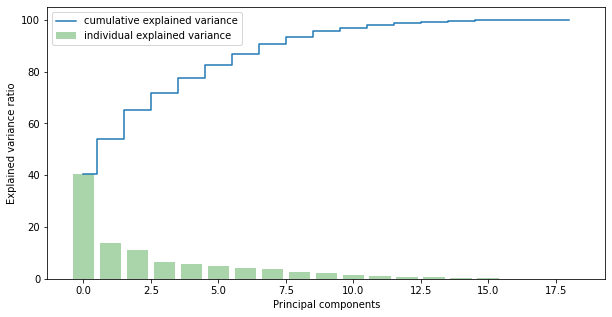

In [4]:
# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(normal_X, axis=0)
cov_mat = np.cov(normal_X.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(19), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(19), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()



In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca_result = pca.fit_transform(normal_X)

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y)))  # 

# plot
sns.scatterplot(pca_result[:,0], pca_result[:,1], hue=y, legend='full', palette=palette)

#plt.title("PCA Covid-19 - K-Means")
plt.savefig("pca_covid19_label_TFID.png")
plt.show()

NameError: name 'y' is not defined

----
## Kmeans
Evaluated using silhouette, distortion and calinski_harabasz metrics. Most of the time they point to different num of clusters. 
Here we choose k=8 based on the silhouette score. 

Visulized by intercluster distance maps.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


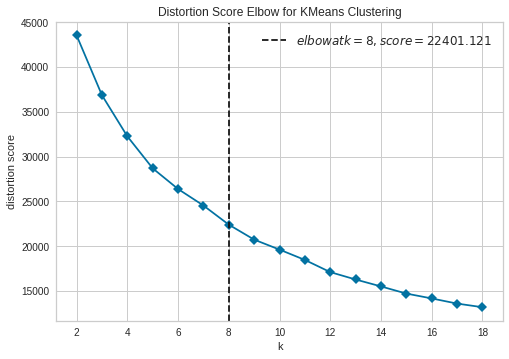

/opt/conda/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/conda/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/conda/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


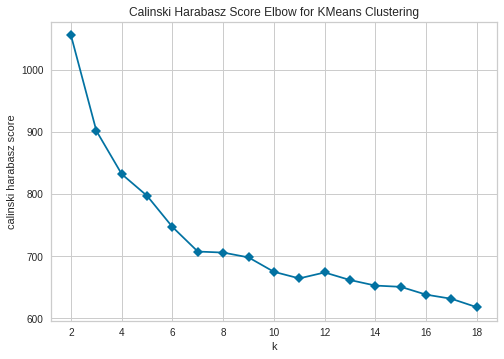

/opt/conda/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/conda/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/conda/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


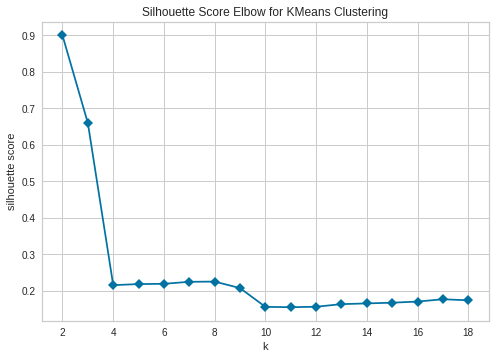

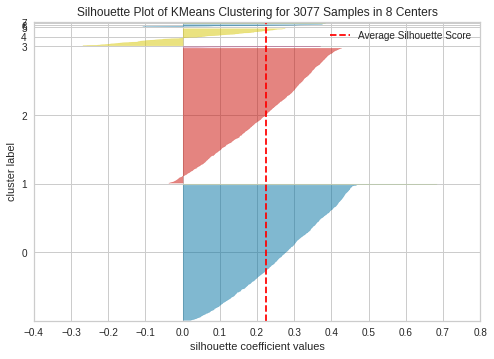

In [6]:
from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(init='k-means++', random_state=42)

'''
Distortion metric--computes the sum of squared distances from each point to its assigned center.
'''
visualizer = KElbowVisualizer(model, k=(2,19), timings=False)
visualizer.fit(normal_X)       
visualizer.show()  
'''
calinski_harabasz metric
'''
visualizer = KElbowVisualizer(
    model, k=(2,19), metric='calinski_harabasz', timings=False
)
visualizer.fit(normal_X)    
visualizer.show() 

'''
silhouette metric-- the mean Silhouette Coefficient of all samples
'''
visualizer = KElbowVisualizer(
    model, k=(2,19), metric='silhouette', timings=False
)
visualizer.fit(normal_X)        
visualizer.show() 

km = KMeans(init='k-means++', random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')

visualizer.fit(normal_X)       
visualizer.show()  

In [7]:
from sklearn import metrics
km8 = KMeans(8, random_state=42, init='k-means++')
kmeans_labels = km8.fit_predict(normal_X)
print('The best k for kmeans is 8, evaluated by silhouette score =', metrics.silhouette_score(normal_X, kmeans_labels, metric='euclidean'))

The best k for kmeans is 8, evaluated by silhouette score = 0.22494730050045397


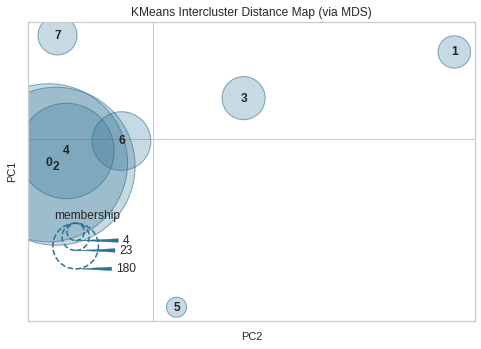

In [8]:
from yellowbrick.cluster import InterclusterDistance
'''
Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved.
'''
visualizer = InterclusterDistance(km8)

visualizer.fit(normal_X)        
visualizer.show()   

kmeans : k=8

---
## Fuzzy c-means 

In [9]:
!pip install fuzzy-c-means

Text(0, 0.5, 'score')

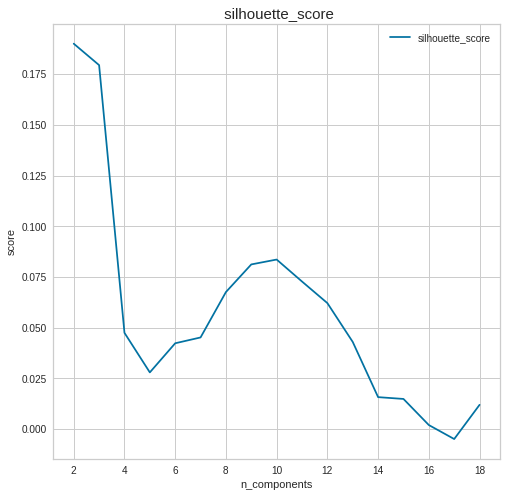

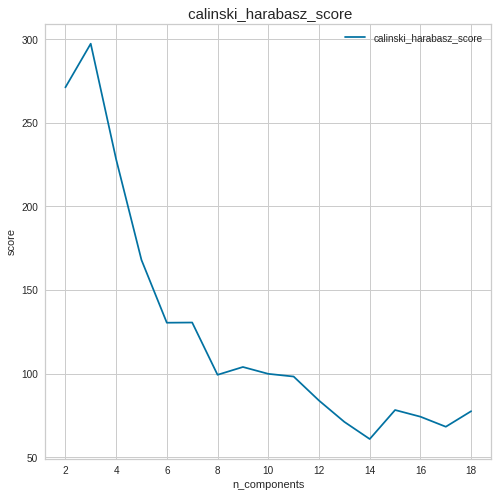

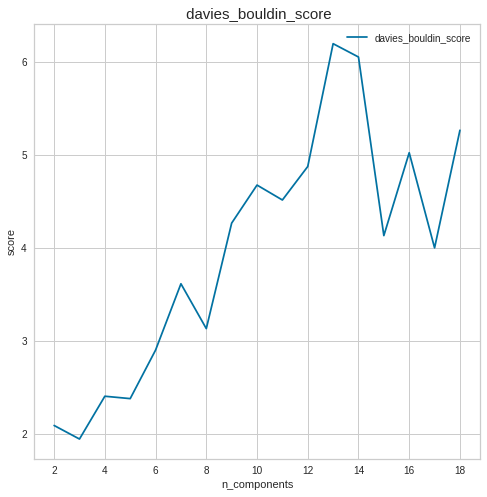

In [10]:
from fcmeans import FCM
from sklearn.metrics import silhouette_score
n_components = np.arange(2, 19)
Fmodels = [FCM(n,random_state=42).fit(normal_X) for n in n_components]
Flabels = [m.predict(normal_X) for m in Fmodels]

Fsil = [metrics.silhouette_score(normal_X, l, metric='euclidean') for l in Flabels]
plt.figure(figsize = (8,8))
plt.plot(n_components, Fsil, label='silhouette_score')
plt.title(" silhouette_score", fontsize=15)
plt.legend(loc='best')
plt.xlabel('n_components')
plt.ylabel("score")

Fchs = [metrics.calinski_harabasz_score(normal_X, l) for l in Flabels]
plt.figure(figsize = (8,8))
plt.plot(n_components, Fchs, label='calinski_harabasz_score')
plt.title(" calinski_harabasz_score", fontsize=15)
plt.legend(loc='best')
plt.xlabel('n_components')
plt.ylabel("score")

from sklearn.metrics import davies_bouldin_score
Fdbs = [metrics.davies_bouldin_score(normal_X, l) for l in Flabels]
plt.figure(figsize = (8,8))
plt.plot(n_components, Fdbs, label='davies_bouldin_score')
plt.title(" davies_bouldin_score", fontsize=15)
plt.legend(loc='best')
plt.xlabel('n_components')
plt.ylabel("score")

n = 3

In [11]:
fcm = FCM(n_clusters=3,random_state=42).fit(normal_X)
fcm_labels =fcm.predict(normal_X)

#fcm_centers = fcm.centers
metrics.silhouette_score(normal_X, fcm_labels, metric='euclidean')

0.17947678910037573

----
## GaussianMixture 

Text(0, 0.5, 'score')

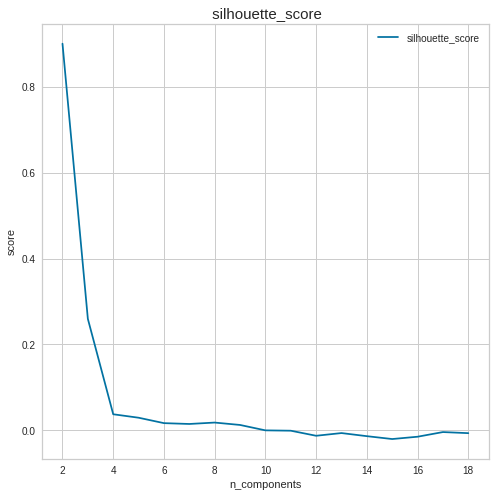

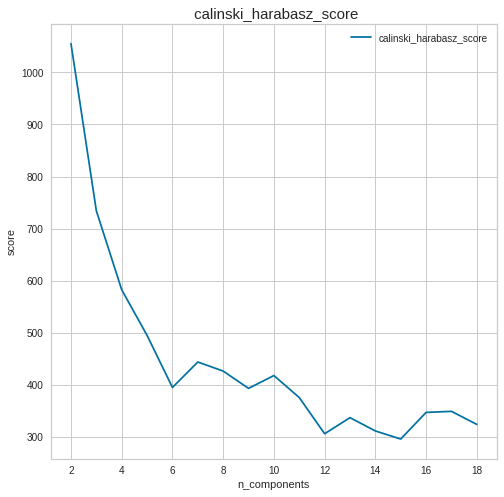

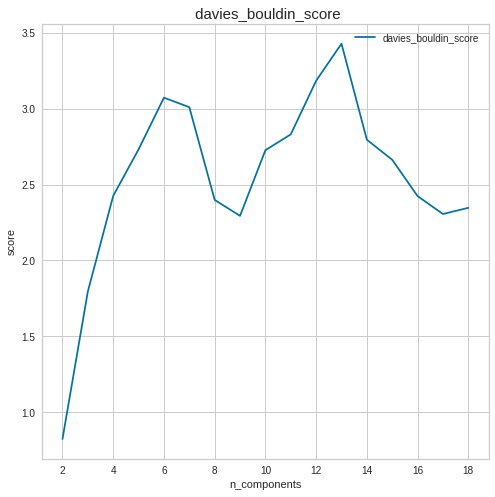

In [12]:
from sklearn.mixture import GaussianMixture as GMM
n_components = np.arange(2, 19)
Gmmmodels = [GMM(n, n_init=2,random_state=42 ).fit(normal_X) for n in n_components]
Glabels = [m.predict(normal_X) for m in Gmmmodels]

Gsil = [metrics.silhouette_score(normal_X, l, metric='euclidean') for l in Glabels]
plt.figure(figsize = (8,8))
plt.plot(n_components, Gsil, label='silhouette_score')
plt.title(" silhouette_score", fontsize=15)
plt.legend(loc='best')
plt.xlabel('n_components')
plt.ylabel("score")

Gchs = [metrics.calinski_harabasz_score(normal_X, l) for l in Glabels]
plt.figure(figsize = (8,8))
plt.plot(n_components, Gchs, label='calinski_harabasz_score')
plt.title(" calinski_harabasz_score", fontsize=15)
plt.legend(loc='best')
plt.xlabel('n_components')
plt.ylabel("score")

from sklearn.metrics import davies_bouldin_score
Gdbs = [metrics.davies_bouldin_score(normal_X, l) for l in Glabels]
plt.figure(figsize = (8,8))
plt.plot(n_components, Gdbs, label='davies_bouldin_score')
plt.title(" davies_bouldin_score", fontsize=15)
plt.legend(loc='best')
plt.xlabel('n_components')
plt.ylabel("score")

Above are not proper criterions for evaluating GaussianMixture.

It seems like the silhouetter score are very high no metter what N. of cluster is choosen. So try other techniques of evaluating GaussianMixture: **AIC and BIC**. 

AIC estimate the information lost by a given model: the less info a model loses, the higher the quality of that model.

BIC: a criterion for model selection among a finite set of models, the model with the lowest BIC is preferred.

Text(0, 0.5, 'score')

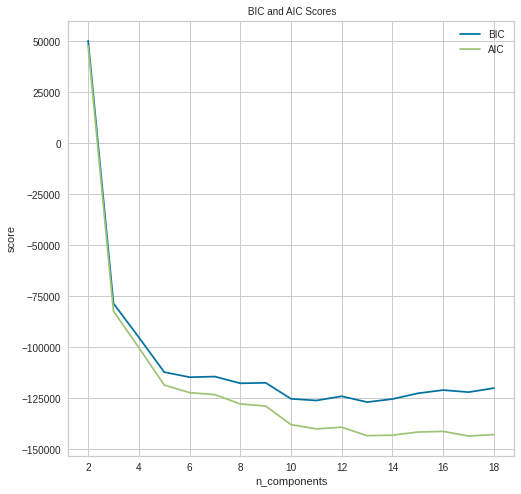

In [13]:
from sklearn.mixture import GaussianMixture as GMM
n_components = np.arange(2,19)
models = [GMM(n, covariance_type='full', random_state=42).fit(normal_X) for n in n_components]
plt.figure(figsize = (8,8))
plt.plot(n_components, [m.bic(normal_X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(normal_X) for m in models], label='AIC')
plt.title(" BIC and AIC Scores", fontsize=10)
plt.legend(loc='best')
plt.xlabel('n_components')
plt.ylabel("score")


Text(0, 0.5, 'grad(BIC) score')

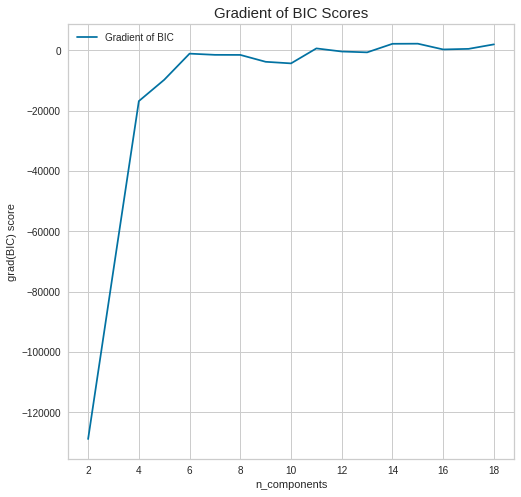

In [14]:
## When either BIC or AIC is linear, try gradient of BIC. 

plt.figure(figsize = (8,8))
plt.plot(n_components, np.gradient([m.bic(normal_X) for m in models]), label='Gradient of BIC')
plt.title("Gradient of BIC Scores", fontsize=15)
plt.legend(loc='best')
plt.xlabel('n_components')
plt.ylabel("grad(BIC) score")

In [15]:
gmm3 = GMM(n_components =3)
gmm3.fit(normal_X)
gmm3_labels = gmm3.predict(normal_X)

#gmm5 = GMM(n_components =5)
#gmm5.fit(normal_X)
#gmm5_labels = gmm5.predict(normal_X)
from sklearn import metrics
print('GaussianMixture 3 silhouette score:', metrics.silhouette_score(normal_X, gmm3_labels, metric='euclidean') )
#print('GaussianMixture 5 silhouette score:',metrics.silhouette_score(normal_X, gmm5_labels, metric='euclidean') )

GaussianMixture 3 silhouette score: 0.25934478201366046


-----
## MiniBatchKMeans
When k =4 

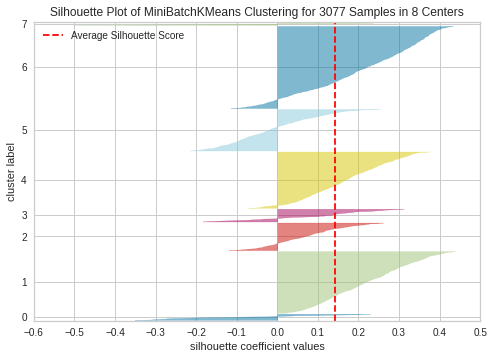

In [16]:
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
mbk = MiniBatchKMeans(init='k-means++', random_state=42, verbose=0)
visualizer = SilhouetteVisualizer(mbk, colors='yellowbrick')

visualizer.fit(normal_X)      
visualizer.show()        

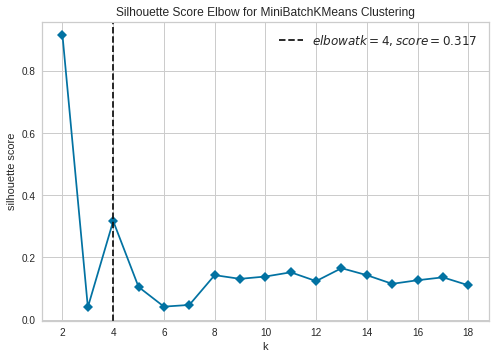

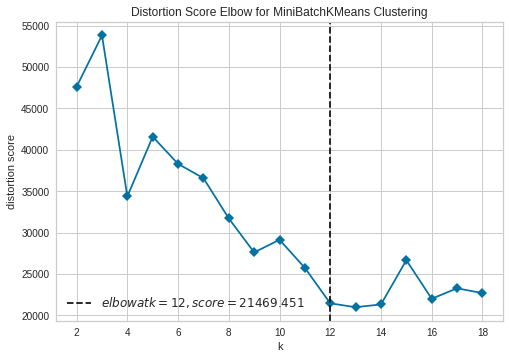

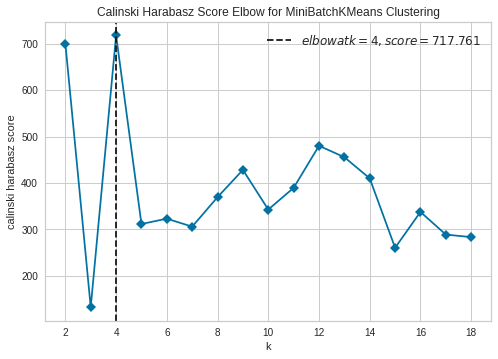

In [17]:
#from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

'''
silhouette metric-- the mean Silhouette Coefficient of all samples
'''
visualizer = KElbowVisualizer(
    mbk, k=(2,19), metric='silhouette', timings=False
)
visualizer.fit(normal_X)       
visualizer.show() 
'''
Distortion metric--computes the sum of squared distances from each point to its assigned center.
'''
visualizer = KElbowVisualizer(mbk, k=(2,19), timings=False)

visualizer.fit(normal_X)       
visualizer.show()
'''
calinski_harabasz metric--for density measurement 
'''
visualizer = KElbowVisualizer(
    mbk, k=(2,19), metric='calinski_harabasz', timings=False
)
visualizer.fit(normal_X)    
visualizer.show() 

In [18]:
from sklearn.cluster import MiniBatchKMeans
mbk4 = MiniBatchKMeans( 4, random_state=42, init='k-means++').fit(normal_X)

mbk4_labels =mbk4.predict(normal_X)

#fcm_centers = fcm.centers
metrics.silhouette_score(normal_X, mbk4_labels, metric='euclidean')

0.31697698948355973

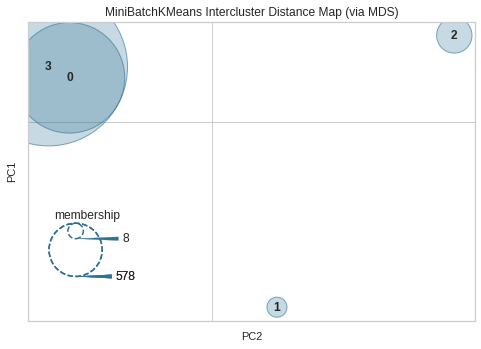

In [19]:
from yellowbrick.cluster import InterclusterDistance
'''
Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved.
'''
visualizer = InterclusterDistance(mbk4)

visualizer.fit(normal_X)       
visualizer.show()   

----
## Conclusion: 

In [20]:
df1 = pd.read_csv("/kaggle/input/cluster/pre_normalized_data8-15.csv")
df1['KMeans'] = kmeans_labels #8
df1['Fuzzycmeans'] = fcm_labels #3
df1['GaussianMixture3'] = gmm3_labels #3 
df1['MiniBatchKMeans'] = mbk4_labels # 4

#clusterlabel1 = df[['FIPS','gmm_labels','kmeans_labels']]
#clusterlabel1.loc['silhouette score'] = ['','0.8867142306078047',' 0.8389039394397746']
#clusterlabel1.to_csv('clusterlabel1.csv', index = False )

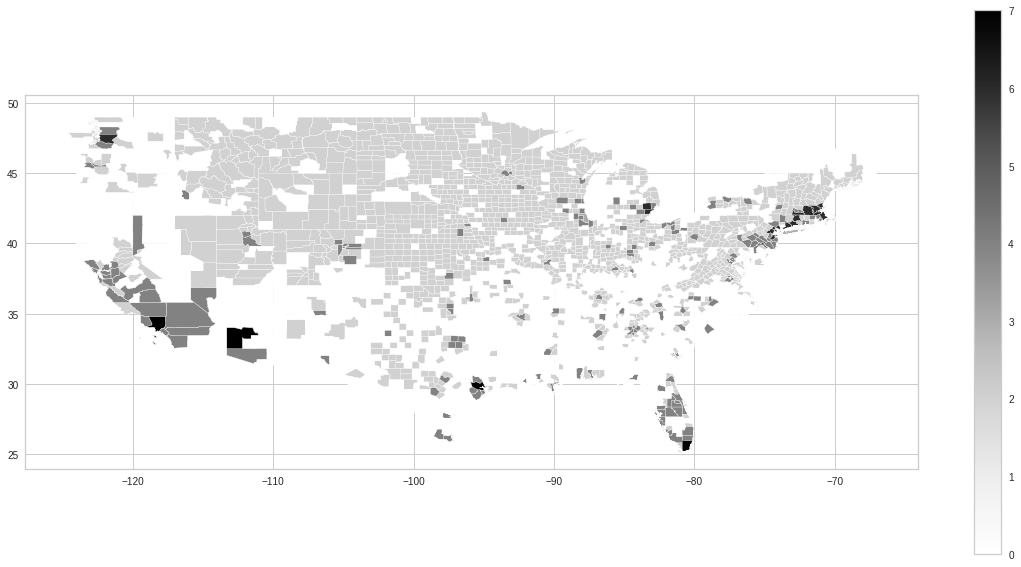

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read in the data
full_data = gpd.read_file("/kaggle/input/cluster/c_03mr20-20200801T185256Z-001/c_03mr20/c_03mr20.shp")

def county_plot(dataframe, data):
    
    shapes = gpd.read_file('/kaggle/input/cluster/c_03mr20-20200801T185256Z-001/c_03mr20/c_03mr20.shp')
    shapes['FIPS'] = shapes['FIPS'].astype('float64')
    
    shape_data = gpd.GeoDataFrame(pd.merge(dataframe, shapes, on='FIPS', how='inner'))
    shape_data.drop_duplicates(subset=['FIPS'], inplace=True)
    shape_data.index = np.arange(len(shape_data))
    
    fig, ax = plt.subplots(1, 1, figsize=(20,10))
    not_akhi = [('AK' not in data.loc[i, 'UID'])&('HI' not in data.loc[i,'UID']) for i in range(len(data))]
    shape_data.loc[not_akhi,:].plot(column='KMeans', legend=True, ax=ax)
    plt.show()
    
# dataframe should be a pandas dataframe with 2 columns:
#    - one called 'FIPS' containing the FIPS codes
#    - one called 'cluster' containing the cluster number.
# data should be a pandas dataframe of the original data, which includes the 'UID' column containing the state abbreviation
# (and also the county name)

county_plot(df1[['FIPS','KMeans']], df1)

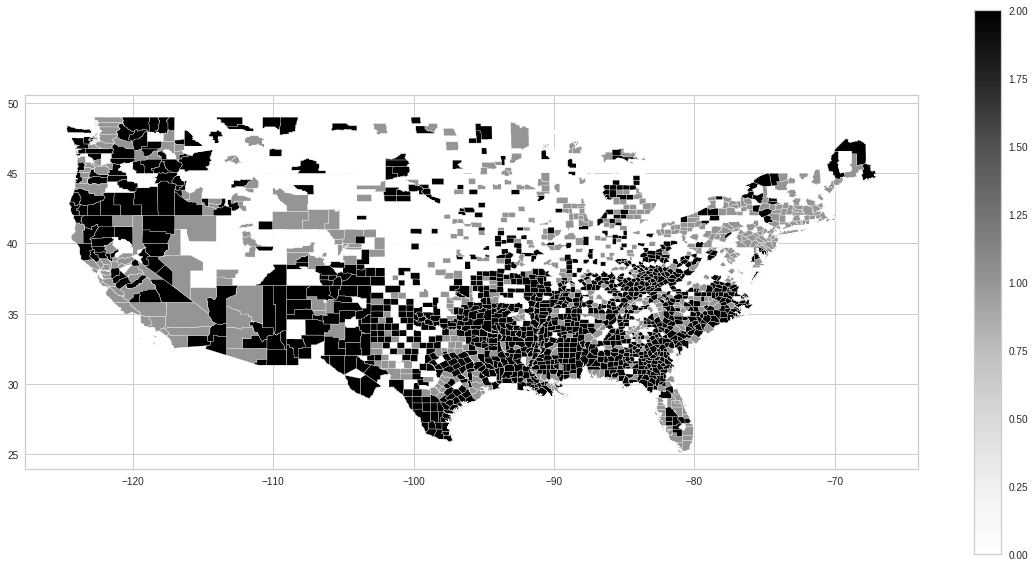

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read in the data
full_data = gpd.read_file("/kaggle/input/cluster/c_03mr20-20200801T185256Z-001/c_03mr20/c_03mr20.shp")

def county_plot(dataframe, data):
    
    shapes = gpd.read_file('/kaggle/input/cluster/c_03mr20-20200801T185256Z-001/c_03mr20/c_03mr20.shp')
    shapes['FIPS'] = shapes['FIPS'].astype('float64')
    
    shape_data = gpd.GeoDataFrame(pd.merge(dataframe, shapes, on='FIPS', how='inner'))
    shape_data.drop_duplicates(subset=['FIPS'], inplace=True)
    shape_data.index = np.arange(len(shape_data))
    
    fig, ax = plt.subplots(1, 1, figsize=(20,10))
    not_akhi = [('AK' not in data.loc[i, 'UID'])&('HI' not in data.loc[i,'UID']) for i in range(len(data))]
    shape_data.loc[not_akhi,:].plot(column='Fuzzycmeans', legend=True, ax=ax)
    plt.show()
    
# dataframe should be a pandas dataframe with 2 columns:
#    - one called 'FIPS' containing the FIPS codes
#    - one called 'cluster' containing the cluster number.
# data should be a pandas dataframe of the original data, which includes the 'UID' column containing the state abbreviation
# (and also the county name)

county_plot(df1[['FIPS','Fuzzycmeans']], df1)

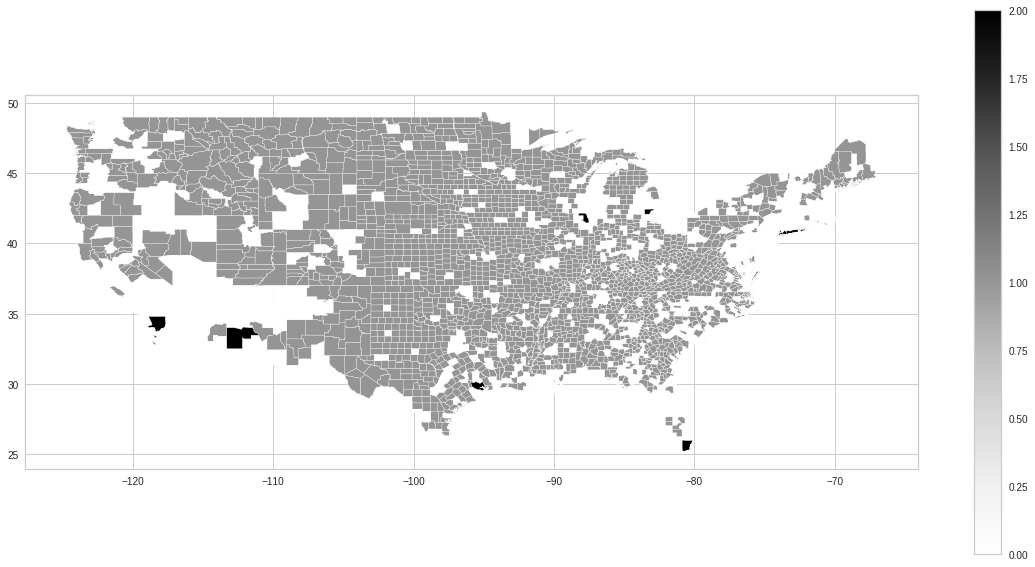

In [23]:
import matplotlib.pyplot as plt

# Read in the data
full_data = gpd.read_file("/kaggle/input/cluster/c_03mr20-20200801T185256Z-001/c_03mr20/c_03mr20.shp")

def county_plot(dataframe, data):
    
    shapes = gpd.read_file('/kaggle/input/cluster/c_03mr20-20200801T185256Z-001/c_03mr20/c_03mr20.shp')
    shapes['FIPS'] = shapes['FIPS'].astype('float64')
    
    shape_data = gpd.GeoDataFrame(pd.merge(dataframe, shapes, on='FIPS', how='inner'))
    shape_data.drop_duplicates(subset=['FIPS'], inplace=True)
    shape_data.index = np.arange(len(shape_data))
    
    fig, ax = plt.subplots(1, 1, figsize=(20,10))
    not_akhi = [('AK' not in data.loc[i, 'UID'])&('HI' not in data.loc[i,'UID']) for i in range(len(data))]
    shape_data.loc[not_akhi,:].plot(column='GaussianMixture3', legend=True, ax=ax)
    plt.show()
    
# dataframe should be a pandas dataframe with 2 columns:
#    - one called 'FIPS' containing the FIPS codes
#    - one called 'cluster' containing the cluster number.
# data should be a pandas dataframe of the original data, which includes the 'UID' column containing the state abbreviation
# (and also the county name)

county_plot(df1[['FIPS','GaussianMixture3']], df1)

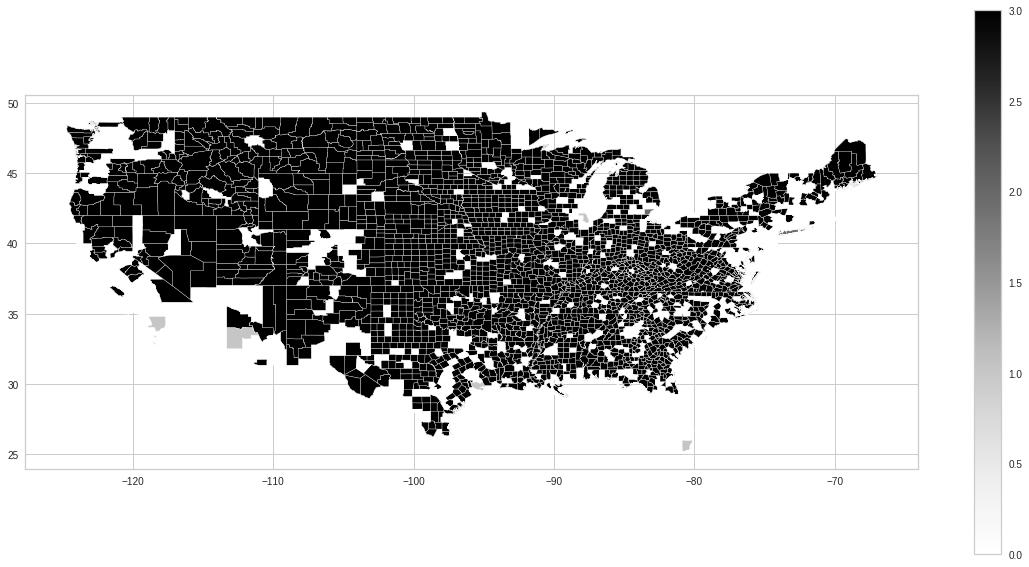

In [24]:
import matplotlib.pyplot as plt

# Read in the data
full_data = gpd.read_file("/kaggle/input/cluster/c_03mr20-20200801T185256Z-001/c_03mr20/c_03mr20.shp")

def county_plot(dataframe, data):
    
    shapes = gpd.read_file('/kaggle/input/cluster/c_03mr20-20200801T185256Z-001/c_03mr20/c_03mr20.shp')
    shapes['FIPS'] = shapes['FIPS'].astype('float64')
    
    shape_data = gpd.GeoDataFrame(pd.merge(dataframe, shapes, on='FIPS', how='inner'))
    shape_data.drop_duplicates(subset=['FIPS'], inplace=True)
    shape_data.index = np.arange(len(shape_data))
    
    fig, ax = plt.subplots(1, 1, figsize=(20,10))
    not_akhi = [('AK' not in data.loc[i, 'UID'])&('HI' not in data.loc[i,'UID']) for i in range(len(data))]
    shape_data.loc[not_akhi,:].plot(column='MiniBatchKMeans', legend=True, ax=ax)
    plt.show()
    
# dataframe should be a pandas dataframe with 2 columns:
#    - one called 'FIPS' containing the FIPS codes
#    - one called 'cluster' containing the cluster number.
# data should be a pandas dataframe of the original data, which includes the 'UID' column containing the state abbreviation
# (and also the county name)

county_plot(df1[['FIPS','MiniBatchKMeans']], df1)

-----
------

[https://towardsdatascience.com/cluster-analysis-create-visualize-and-interpret-customer-segments-474e55d00ebb](http://)

### Variance within variables and between clusters

One assumption of variable importance in cluster tasks is that if the average value of a variable ordered by clusters differs significantly among each other, that variable is likely important in creating the clusters.

In [25]:
df = pd.read_csv('/kaggle/input/cluster/pre_normalized_data8-15.csv')
df['KMeans'] = kmeans_labels #8
df['Fuzzycmeans'] = fcm_labels #3
df['GaussianMixture'] = gmm3_labels #3 
df['MiniBatchKMeans'] = mbk4_labels # 4
df[['FIPS','KMeans','Fuzzycmeans','GaussianMixture','MiniBatchKMeans']].to_csv('clusters_8-15.csv', index = False)


**Calculate the variance of means between clusters within each variable and select the top 7 variables with the highest variance:**

['area_sqmi(svi)', 'cumulative_deaths_august8', 'deaths_july23', 'new_cases_july23', 'slope_to_first_peak', 'new_cases_april12', 'deaths_april12', 'kmeans']
['area_sqmi(svi)', 'cumulative_deaths_august8', 'deaths_july23', 'new_cases_july23', 'slope_to_first_peak', 'new_cases_april12', 'deaths_april12', 'kmeans']


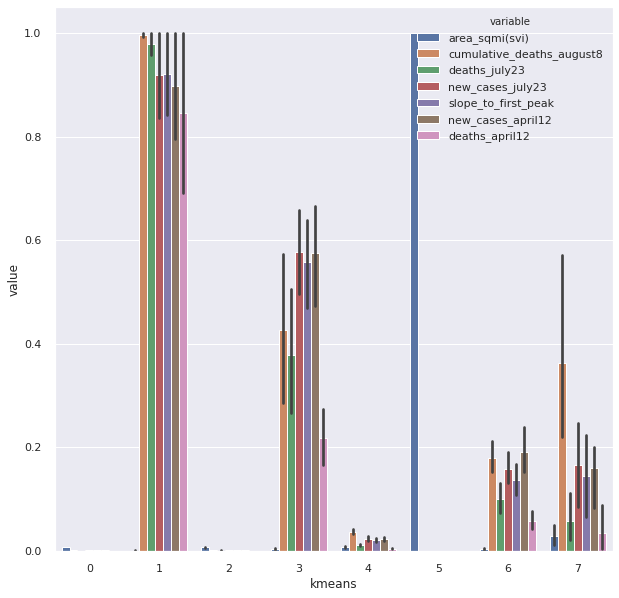

In [26]:
from sklearn.preprocessing import MinMaxScaler
df = df[['area_sqmi(svi)',
       'population(svi)', 'ranking_socioeconomic(svi)',
       'ranking_householdcomp(svi)', 'ranking_minoritylang(svi)',
       'ranking_housingtransport(svi)', 'rurality(irr)', 'icu beds(kaiser)',
       'number_of_locations', 'overall_score', 'nursing_home_population',
       'slope_to_first_peak', 'last_month_slope', 'new_cases_april12',
       'deaths_april12', 'new_cases_july23', 'deaths_july23',
       'cumulative_cases_august8', 'cumulative_deaths_august8']]
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.columns =  df.columns
df_scaled['kmeans'] = kmeans_labels
df_mean = (df_scaled.loc[df_scaled.kmeans!=-1, :]
                    .groupby('kmeans').mean())


results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[0:]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
selected_columns = list(results.sort_values(
        'Var', ascending=False,
    ).head(7).Variable.values) + ['kmeans']

tidy = df_scaled[selected_columns].melt(id_vars='kmeans')
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(x='kmeans', y='value', hue='variable', data=tidy)
print(selected_columns)
#selected_columns[:-1]
kmeans_features = selected_columns
print(kmeans_features)

In [27]:
kmeans_features[:-1]

['area_sqmi(svi)',
 'cumulative_deaths_august8',
 'deaths_july23',
 'new_cases_july23',
 'slope_to_first_peak',
 'new_cases_april12',
 'deaths_april12']

In [28]:
'''
Using Jenks optimization method to check the homoginety of sel_features clustered by k=8 with the Kmeans clusters 
'''
import jenkspy
breaks =[]
for i in kmeans_features[:-1]:
    breaks.append(jenkspy.jenks_breaks(df[i], 8))  # km 8 clusters
breaks = pd.DataFrame(breaks).T
breaks.columns = kmeans_features[:-1]

Kmeans = df[kmeans_features[:-1]]

from sklearn.metrics.cluster import v_measure_score
km = df1['KMeans'][:3077]

result = []
for i in kmeans_features[:-1]:
    criteria = [Kmeans[i].between(breaks[i][0], breaks[i][1]), 
            Kmeans[i].between(breaks[i][1], breaks[i][2]), 
            Kmeans[i].between(breaks[i][2], breaks[i][3]),
               Kmeans[i].between(breaks[i][3], breaks[i][4]),
               Kmeans[i].between(breaks[i][4], breaks[i][5]),
               Kmeans[i].between(breaks[i][5], breaks[i][6]),
               Kmeans[i].between(breaks[i][6], breaks[i][7]),
               Kmeans[i].between(breaks[i][7], breaks[i][8])]
    values = [1, 2, 3, 4, 5, 6, 7, 8]
    result.append(v_measure_score(np.select(criteria, values, 0), km))
result
from pandas import DataFrame 
km_features_vscore = DataFrame(result).T
km_features_vscore.columns = kmeans_features[:-1]
km_features_vscore

ModuleNotFoundError: No module named 'jenkspy'

In [29]:
!pip install jenkspy

     |████████████████████████████████| 49 kB 256 kB/s 
  Created wheel for jenkspy: filename=jenkspy-0.1.5-cp37-cp37m-linux_x86_64.whl size=70505 sha256=198a14a4dec8243d8874e219456e8f76e8bb017b8dea6acc3e65a10763f4548a
  Stored in directory: /root/.cache/pip/wheels/0b/85/21/d6ad34790e0cb12678f456b60894fc82057f4235a8cd3da330
Successfully built jenkspy


## Random Forest Feature Selection

Lastly, we can use the clusters as a target variable and then apply Random Forest to understand which features are important in the generation of the clusters. This method requires a bit more work since you will have to check the accuracy of your model to accurately extract important features.
In this example I am going to skip that step since we are dealing with imbalanced targets and multiple classes:

### k-means, feature importance

['ranking_socioeconomic(svi)',
 'ranking_householdcomp(svi)',
 'ranking_housingtransport(svi)',
 'ranking_minoritylang(svi)',
 'population(svi)',
 'cumulative_cases_august8',
 'rurality(irr)']

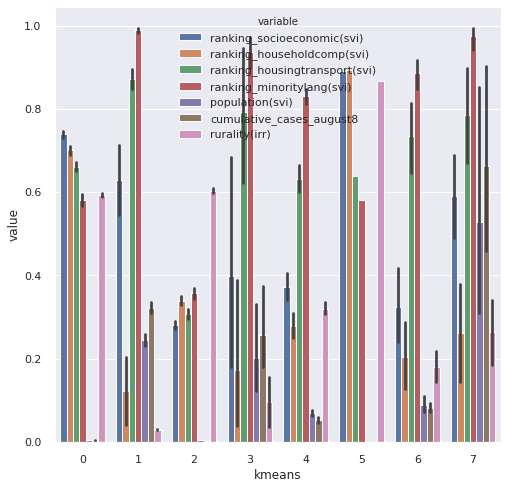

In [30]:
from sklearn.preprocessing import MinMaxScaler
df = df[['area_sqmi(svi)',
       'population(svi)', 'ranking_socioeconomic(svi)',
       'ranking_householdcomp(svi)', 'ranking_minoritylang(svi)',
       'ranking_housingtransport(svi)', 'rurality(irr)', 'icu beds(kaiser)',
       'number_of_locations', 'overall_score', 'nursing_home_population',
       'slope_to_first_peak', 'last_month_slope', 'new_cases_april12',
       'deaths_april12', 'new_cases_july23', 'deaths_july23',
       'cumulative_cases_august8', 'cumulative_deaths_august8']]
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.columns =  df.columns
df_scaled['kmeans'] = kmeans_labels
df_mean = (df_scaled.loc[df_scaled.kmeans!=-1, :]
                    .groupby('kmeans').mean())

from sklearn.ensemble import RandomForestClassifier

X, y = df_scaled.iloc[:,:-1], df_scaled.iloc[:,-1]

clf_KMeans = RandomForestClassifier(n_estimators=100).fit(X, y)

data = np.array([clf_KMeans.feature_importances_, X.columns]).T
columns = list(pd.DataFrame(data, columns=['Importance', 'Feature'])
           .sort_values("Importance", ascending=False)
           .head(7).Feature.values)
tidy_KMeans = df_scaled[columns+['kmeans']].melt(id_vars='kmeans')
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x='kmeans', y='value', hue='variable', data=tidy_KMeans)
kmeans_features = columns

kmeans_features

In [31]:
'''
Using Jenks optimization method to check the homoginety of sel_features clustered by k=8 with the Kmeans clusters 
'''
import jenkspy
breaks =[]
for i in kmeans_features:
    breaks.append(jenkspy.jenks_breaks(df[i], 8))  # km 8 clusters
breaks = pd.DataFrame(breaks).T
breaks.columns = kmeans_features

Kmeans = df[kmeans_features]

from sklearn.metrics.cluster import v_measure_score
km = df1['KMeans'][:3077]

result = []
for i in kmeans_features:
    criteria = [Kmeans[i].between(breaks[i][0], breaks[i][1]), 
            Kmeans[i].between(breaks[i][1], breaks[i][2]), 
            Kmeans[i].between(breaks[i][2], breaks[i][3]),
               Kmeans[i].between(breaks[i][3], breaks[i][4]),
               Kmeans[i].between(breaks[i][4], breaks[i][5]),
               Kmeans[i].between(breaks[i][5], breaks[i][6]),
               Kmeans[i].between(breaks[i][6], breaks[i][7]),
               Kmeans[i].between(breaks[i][7], breaks[i][8])]
    values = [1, 2, 3, 4, 5, 6, 7, 8]
    result.append(v_measure_score(np.select(criteria, values, 0), km))
result
from pandas import DataFrame 
km_features_vscore = DataFrame(result).T
km_features_vscore.columns = kmeans_features
km_features_vscore

,ranking_socioeconomic(svi),ranking_householdcomp(svi),ranking_housingtransport(svi),ranking_minoritylang(svi),population(svi),cumulative_cases_august8,rurality(irr)
0,0.272713,0.169207,0.15193,0.100293,0.268914,0.283737,0.154599


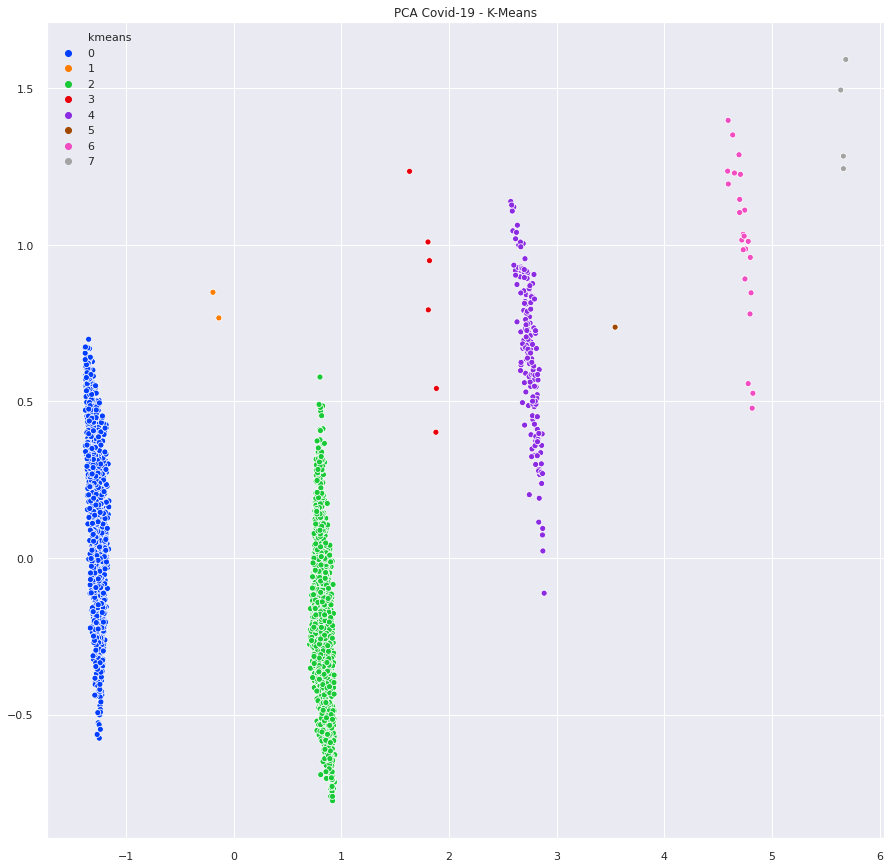

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca_result = pca.fit_transform(df_scaled)

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y)))

# plot
sns.scatterplot(pca_result[:,0], pca_result[:,1], hue=y, legend='full', palette=palette)
plt.title("PCA Covid-19 - K-Means")
# plt.savefig("plots/pca_covid19_label_TFID.png")
plt.show()

---------
### Fuzzycmeans feature importance & features v_measure_score
1.0 strong agreements ; 0.0 low agreements

['ranking_socioeconomic(svi)',
 'ranking_housingtransport(svi)',
 'ranking_householdcomp(svi)',
 'ranking_minoritylang(svi)',
 'rurality(irr)',
 'population(svi)',
 'cumulative_cases_august8']

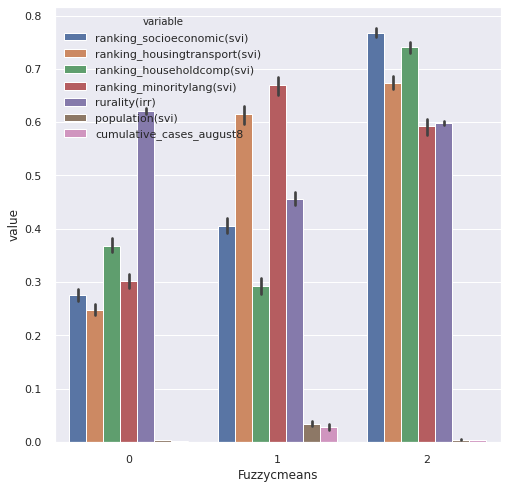

In [33]:
from sklearn.preprocessing import MinMaxScaler
df = df[['area_sqmi(svi)',
       'population(svi)', 'ranking_socioeconomic(svi)',
       'ranking_householdcomp(svi)', 'ranking_minoritylang(svi)',
       'ranking_housingtransport(svi)', 'rurality(irr)', 'icu beds(kaiser)',
       'number_of_locations', 'overall_score', 'nursing_home_population',
       'slope_to_first_peak', 'last_month_slope', 'new_cases_april12',
       'deaths_april12', 'new_cases_july23', 'deaths_july23',
       'cumulative_cases_august8', 'cumulative_deaths_august8']]
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.columns =  df.columns
df_scaled['Fuzzycmeans'] = fcm_labels
df_mean = (df_scaled.loc[df_scaled.Fuzzycmeans!=-1, :]
                    .groupby('Fuzzycmeans').mean())

from sklearn.ensemble import RandomForestClassifier
X, y = df_scaled.iloc[:,:-1], df_scaled.iloc[:,-1]

clf_Fuzzycmeans = RandomForestClassifier(n_estimators=100).fit(X, y)

data = np.array([clf_Fuzzycmeans.feature_importances_, X.columns]).T
columns = list(pd.DataFrame(data, columns=['Importance', 'Feature'])
           .sort_values("Importance", ascending=False)
           .head(7).Feature.values)
tidy_Fuzzycmeans = df_scaled[columns+['Fuzzycmeans']].melt(id_vars='Fuzzycmeans')
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x='Fuzzycmeans', y='value', hue='variable', data=tidy_Fuzzycmeans)

selcol_Fuzzycmeans = columns
selcol_Fuzzycmeans

In [34]:
'''
Using Jenks optimization method to check the homoginety of sel_features clustered by k=8 with the Kmeans clusters 
'''
import jenkspy
breaks =[]
for i in selcol_Fuzzycmeans:
    breaks.append(jenkspy.jenks_breaks(df[i], 3))  # Fcm 3 clusters
breaks = pd.DataFrame(breaks).T
breaks.columns = selcol_Fuzzycmeans

Fuzzycmeans = df[selcol_Fuzzycmeans]

from sklearn.metrics.cluster import v_measure_score
fcm = df1['Fuzzycmeans'][:3077]

result = []
for i in selcol_Fuzzycmeans:
    criteria = [Fuzzycmeans[i].between(breaks[i][0], breaks[i][1]), 
            Fuzzycmeans[i].between(breaks[i][1], breaks[i][2]), 
            Fuzzycmeans[i].between(breaks[i][2], breaks[i][3])]
    values = [1, 2, 3]
    #fcm[i] = np.select(criteria, values, 0)
    #v_measure_score(fcm[i], df1['Fuzzycmeans'])
    result.append(v_measure_score(np.select(criteria, values, 0), fcm))
#results = pd.DataFrame(columns=selcol_Fuzzycmeans)
result
from pandas import DataFrame 
fcm_features_vscore = DataFrame(result).T
fcm_features_vscore.columns = selcol_Fuzzycmeans
fcm_features_vscore

,ranking_socioeconomic(svi),ranking_housingtransport(svi),ranking_householdcomp(svi),ranking_minoritylang(svi),rurality(irr),population(svi),cumulative_cases_august8
0,0.336379,0.239229,0.233125,0.14406,0.119135,0.081151,0.055716


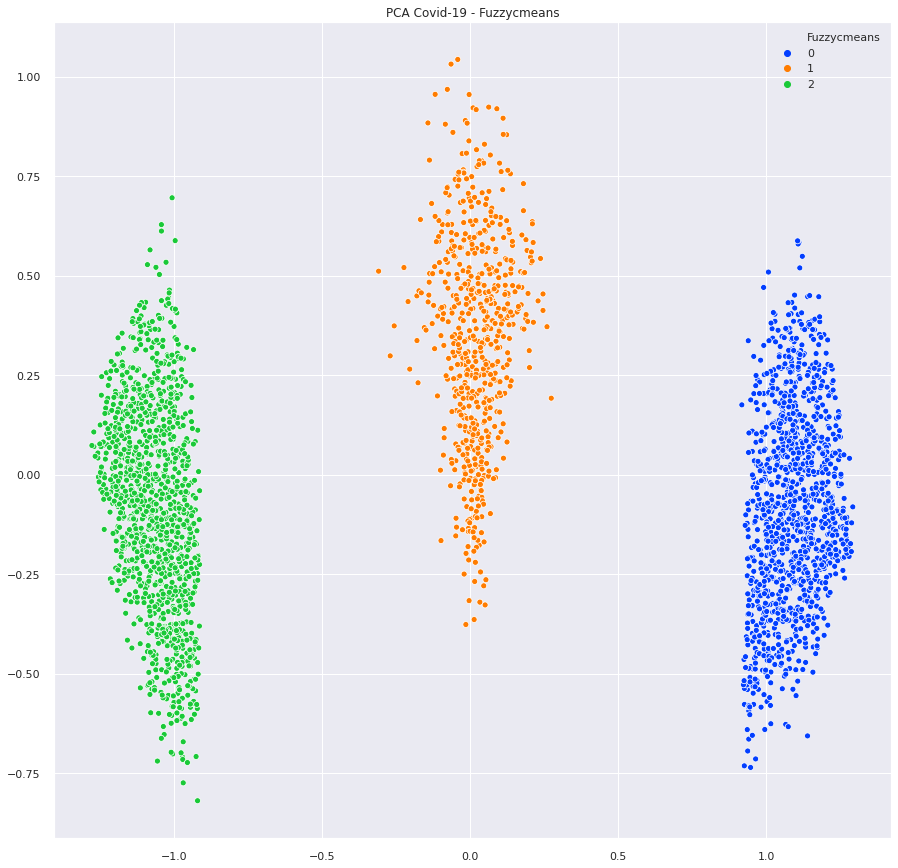

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca_result = pca.fit_transform(df_scaled)

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y)))

# plot
sns.scatterplot(pca_result[:,0], pca_result[:,1], hue=y, legend='full', palette=palette)
plt.title("PCA Covid-19 - Fuzzycmeans")
# plt.savefig("plots/pca_covid19_label_TFID.png")
plt.show()

-----
### GaussianMixture3 feature importance & features v_measure_score

['new_cases_july23',
 'slope_to_first_peak',
 'cumulative_cases_august8',
 'population(svi)',
 'cumulative_deaths_august8',
 'icu beds(kaiser)',
 'rurality(irr)']

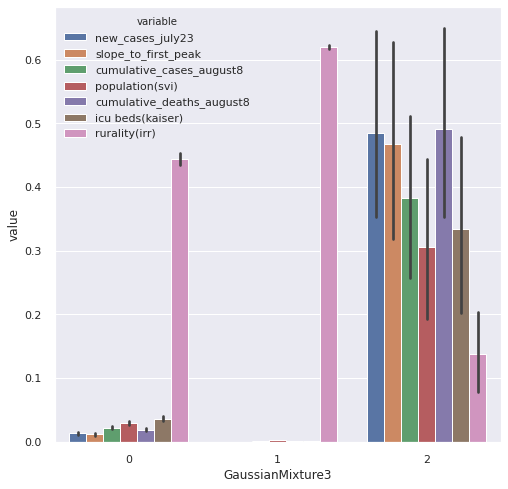

In [36]:
from sklearn.preprocessing import MinMaxScaler
df = df[['area_sqmi(svi)',
       'population(svi)', 'ranking_socioeconomic(svi)',
       'ranking_householdcomp(svi)', 'ranking_minoritylang(svi)',
       'ranking_housingtransport(svi)', 'rurality(irr)', 'icu beds(kaiser)',
       'number_of_locations', 'overall_score', 'nursing_home_population',
       'slope_to_first_peak', 'last_month_slope', 'new_cases_april12',
       'deaths_april12', 'new_cases_july23', 'deaths_july23',
       'cumulative_cases_august8', 'cumulative_deaths_august8']]
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.columns =  df.columns
df_scaled['GaussianMixture3'] = gmm3_labels
df_mean = (df_scaled.loc[df_scaled.GaussianMixture3!=-1, :]
                    .groupby('GaussianMixture3').mean())

from sklearn.ensemble import RandomForestClassifier
X, y = df_scaled.iloc[:,:-1], df_scaled.iloc[:,-1]

clf_GaussianMixture3 = RandomForestClassifier(n_estimators=100).fit(X, y)

data = np.array([clf_GaussianMixture3.feature_importances_, X.columns]).T
columns = list(pd.DataFrame(data, columns=['Importance', 'Feature'])
           .sort_values("Importance", ascending=False)
           .head(7).Feature.values)
tidy_GaussianMixture3 = df_scaled[columns+['GaussianMixture3']].melt(id_vars='GaussianMixture3')
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x='GaussianMixture3', y='value', hue='variable', data=tidy_GaussianMixture3)

GaussianMixture3_features = columns
  
GaussianMixture3_features   

In [37]:
'''
Using Jenks optimization method to check the homoginety of sel_features clustered by k=8 with the Kmeans clusters 
'''
import jenkspy
breaks =[]
for i in GaussianMixture3_features:
    breaks.append(jenkspy.jenks_breaks(df[i], 3))  # gmm 3 clusters
breaks = pd.DataFrame(breaks).T
breaks.columns = GaussianMixture3_features

GaussianMixture3 = df[GaussianMixture3_features]

from sklearn.metrics.cluster import v_measure_score
gmm = df1['GaussianMixture3'][:3077]

result = []
for i in GaussianMixture3_features:
    criteria = [GaussianMixture3[i].between(breaks[i][0], breaks[i][1]), 
            GaussianMixture3[i].between(breaks[i][1], breaks[i][2]), 
            GaussianMixture3[i].between(breaks[i][2], breaks[i][3])]
    values = [1, 2, 3]
    result.append(v_measure_score(np.select(criteria, values, 0), gmm))
#results = pd.DataFrame(columns=selcol_Fuzzycmeans)
result
from pandas import DataFrame 
gmm_features_vscore = DataFrame(result).T
gmm_features_vscore.columns = GaussianMixture3_features
gmm_features_vscore

,new_cases_july23,slope_to_first_peak,cumulative_cases_august8,population(svi),cumulative_deaths_august8,icu beds(kaiser),rurality(irr)
0,0.092308,0.087827,0.142554,0.173896,0.120032,0.137945,0.274003


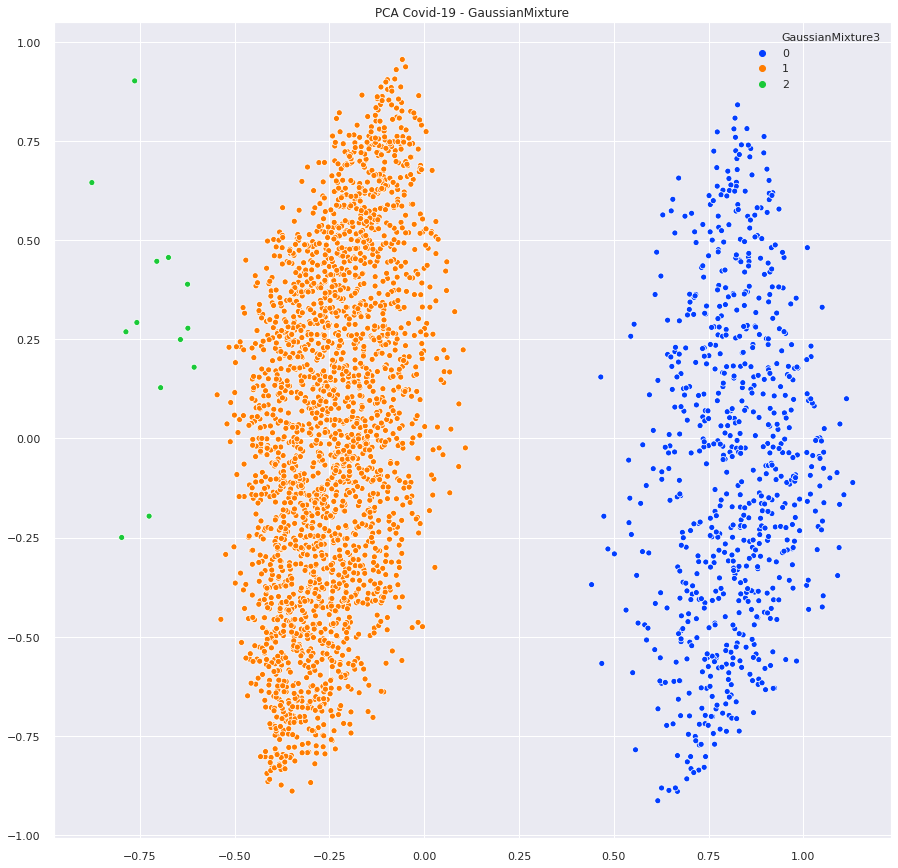

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca_result = pca.fit_transform(df_scaled)

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y)))

# plot
sns.scatterplot(pca_result[:,0], pca_result[:,1], hue=y, legend='full', palette=palette)
plt.title("PCA Covid-19 - GaussianMixture")
# plt.savefig("plots/pca_covid19_label_TFID.png")
plt.show()

------
### MiniBatchKMeans 4 feature importance & features v_measure_score

['population(svi)',
 'rurality(irr)',
 'cumulative_cases_august8',
 'overall_score',
 'icu beds(kaiser)',
 'last_month_slope',
 'slope_to_first_peak']

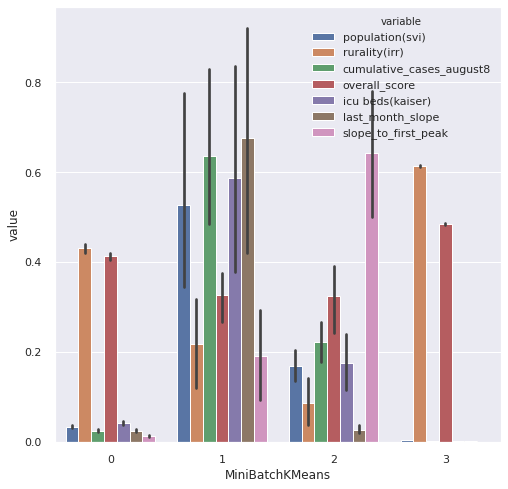

In [39]:
from sklearn.preprocessing import MinMaxScaler
df = df[['area_sqmi(svi)',
       'population(svi)', 'ranking_socioeconomic(svi)',
       'ranking_householdcomp(svi)', 'ranking_minoritylang(svi)',
       'ranking_housingtransport(svi)', 'rurality(irr)', 'icu beds(kaiser)',
       'number_of_locations', 'overall_score', 'nursing_home_population',
       'slope_to_first_peak', 'last_month_slope', 'new_cases_april12',
       'deaths_april12', 'new_cases_july23', 'deaths_july23',
       'cumulative_cases_august8', 'cumulative_deaths_august8']]
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.columns =  df.columns
df_scaled['MiniBatchKMeans'] = mbk4_labels
df_mean = (df_scaled.loc[df_scaled.MiniBatchKMeans!=-1, :]
                    .groupby('MiniBatchKMeans').mean())

from sklearn.ensemble import RandomForestClassifier
X, y = df_scaled.iloc[:,:-1], df_scaled.iloc[:,-1]

clf_MiniBatchKMeans = RandomForestClassifier(n_estimators=100).fit(X, y)

data = np.array([clf_MiniBatchKMeans.feature_importances_, X.columns]).T
columns = list(pd.DataFrame(data, columns=['Importance', 'Feature'])
           .sort_values("Importance", ascending=False)
           .head(7).Feature.values)
tidy_MiniBatchKMeans = df_scaled[columns+['MiniBatchKMeans']].melt(id_vars='MiniBatchKMeans')
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x='MiniBatchKMeans', y='value', hue='variable', data=tidy_MiniBatchKMeans)

MiniBatchKMeans_features = columns
  
MiniBatchKMeans_features   

In [40]:
'''
Using Jenks optimization method to check the homoginety of sel_features clustered by k=8 with the Kmeans clusters 
'''
import jenkspy
breaks =[]
for i in MiniBatchKMeans_features:
    breaks.append(jenkspy.jenks_breaks(df[i], 4))  # mbk 4 clusters
breaks = pd.DataFrame(breaks).T
breaks.columns = MiniBatchKMeans_features

MiniBatchKMeans = df[MiniBatchKMeans_features]

from sklearn.metrics.cluster import v_measure_score
mbk = df1['MiniBatchKMeans'][:3077]

result = []
for i in MiniBatchKMeans_features:
    criteria = [MiniBatchKMeans[i].between(breaks[i][0], breaks[i][1]), 
            MiniBatchKMeans[i].between(breaks[i][1], breaks[i][2]), 
            MiniBatchKMeans[i].between(breaks[i][2], breaks[i][3]),
            MiniBatchKMeans[i].between(breaks[i][3], breaks[i][4])]
    values = [1, 2, 3, 4]
    result.append(v_measure_score(np.select(criteria, values, 0), mbk))
#results = pd.DataFrame(columns=selcol_Fuzzycmeans)
result
from pandas import DataFrame 
mbk_features_vscore = DataFrame(result).T
mbk_features_vscore.columns = MiniBatchKMeans_features
mbk_features_vscore

,population(svi),rurality(irr),cumulative_cases_august8,overall_score,icu beds(kaiser),last_month_slope,slope_to_first_peak
0,0.289316,0.244794,0.277041,0.079274,0.317856,0.213276,0.110003


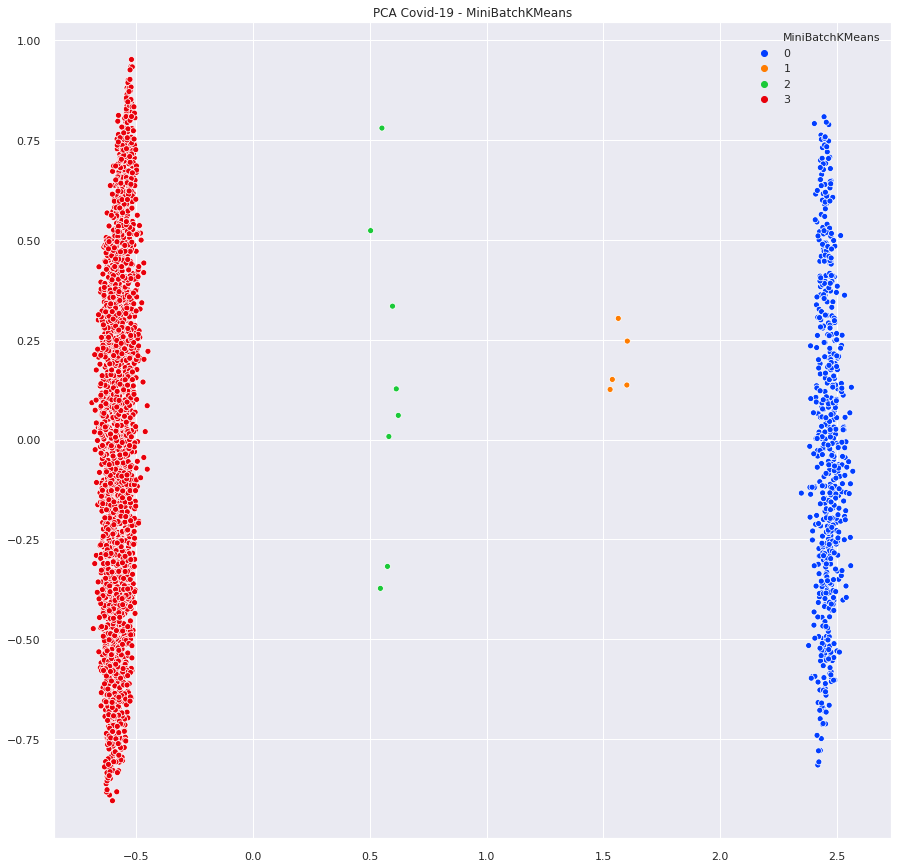

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca_result = pca.fit_transform(df_scaled)

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y)))

# plot
sns.scatterplot(pca_result[:,0], pca_result[:,1], hue=y, legend='full', palette=palette)
plt.title("PCA Covid-19 - MiniBatchKMeans")
# plt.savefig("plots/pca_covid19_label_TFID.png")
plt.show()

-------
## visualization TSNE

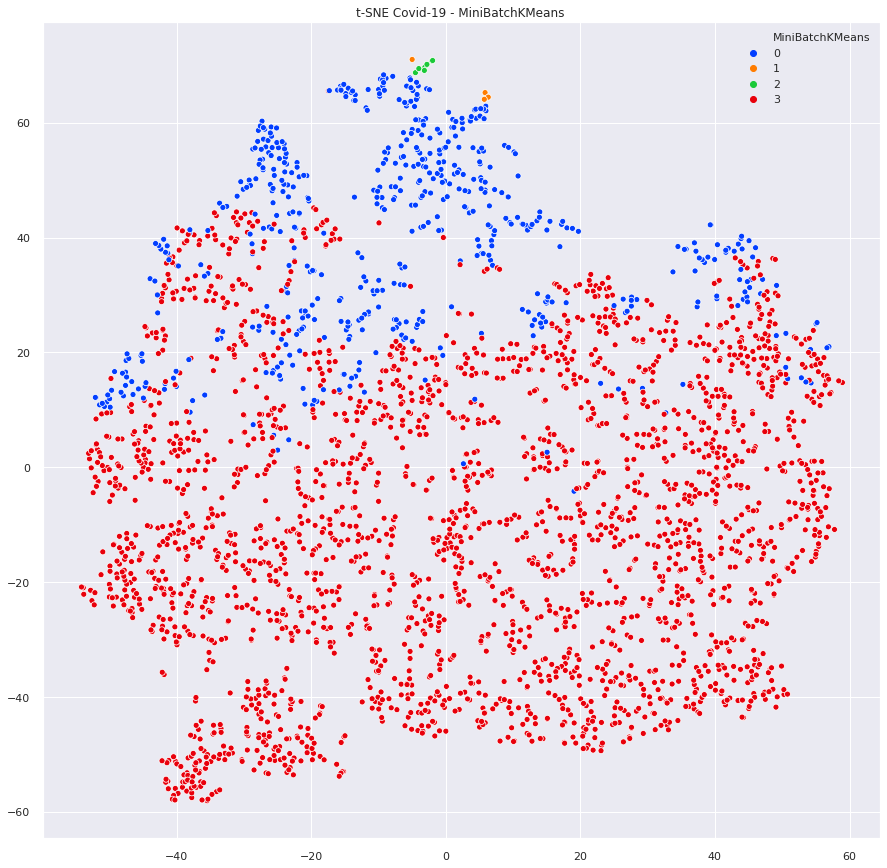

In [42]:
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
tsne = TSNE()
X_embedded = tsne.fit_transform(normal_X)

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y)))

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)
plt.title("t-SNE Covid-19 - MiniBatchKMeans ")
# plt.savefig("plots/t-sne_covid19_label_TFID.png")
plt.show()

----
## Self Organizing Maps 
[https://towardsdatascience.com/self-organizing-maps-ff5853a118d4](http://)

In [43]:
! pip install somoclu

     |████████████████████████████████| 6.1 MB 3.9 MB/s 
  Created wheel for somoclu: filename=somoclu-1.7.5.1-cp37-cp37m-linux_x86_64.whl size=222226 sha256=7511561ed742c6437c8d2f98c2ff9cbc9bf54c646f04f630808ab792e031903b
  Stored in directory: /root/.cache/pip/wheels/d5/81/eb/22b023e9cac575c4b87d3f9a7318094124e5d8cf90600726fa
Successfully built somoclu


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
%matplotlib inline
from pandas import DataFrame
normal_X = DataFrame(normal_X)
normal_X.to_csv('normal_X.csv', index = False)

c1 = np.genfromtxt('normal_X.csv', delimiter=',', usecols=(0, 1, 2, 3), max_rows =437 ) 
c2 = np.genfromtxt('normal_X.csv', delimiter=',', usecols=(0, 1, 2, 3),skip_header = 437, max_rows = 437)
c3 = np.genfromtxt('normal_X.csv', delimiter=',', usecols=(0, 1, 2, 3),skip_header=434*2, max_rows = 437)
c4 = np.genfromtxt('normal_X.csv', delimiter=',', usecols=(0, 1, 2, 3),skip_header=434*3, max_rows = 438)
data = np.float32(np.concatenate((c1, c2, c3,c4)))
 
colors = ["red"] * 437
colors.extend(["green"] * 437)
colors.extend(["blue"] * 437)
colors.extend(["yellow"] * 438)
#fig = plt.figure()
#ax = Axes3D(fig)
#ax.scatter(data[:, 0], data[:, 1], data[:, 2], data[:, 3], c=colors)
labels = range(1749)


In [45]:
n_rows, n_columns = 100,160
som = somoclu.Somoclu(n_columns, n_rows, data=data)
som.train(epochs=10)
%time som.train()

CPU times: user 1min 14s, sys: 241 ms, total: 1min 14s
Wall time: 21.9 s


/opt/conda/lib/python3.7/site-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/opt/conda/lib/python3.7/site-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/opt/conda/lib/python3.7/site-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


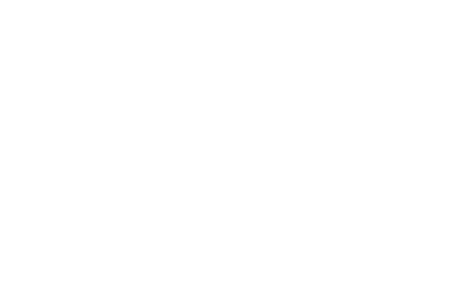

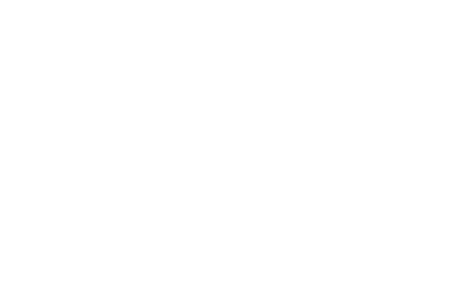

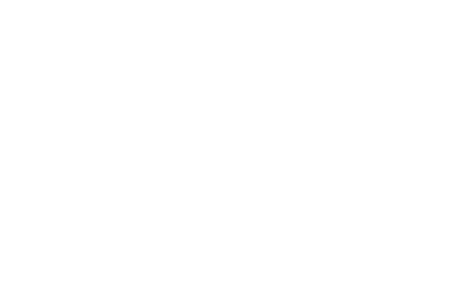

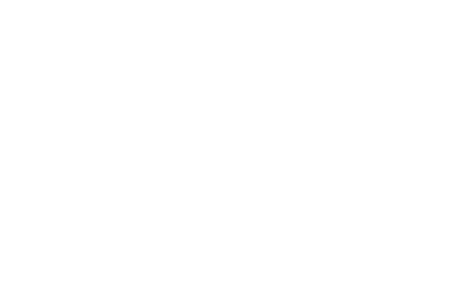

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [46]:
som.view_component_planes()

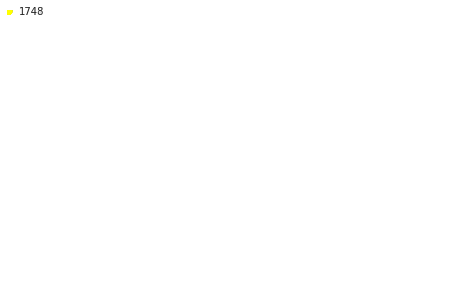

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [47]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)

**Toroid topology** --repeat the above with a toroid topology by specifying the map type as follows:

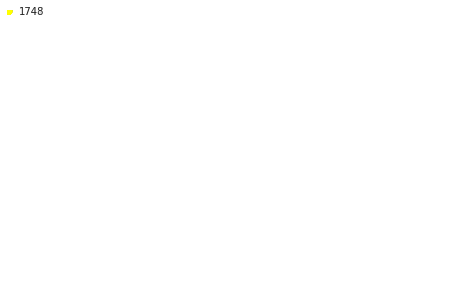

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [48]:
som2 = somoclu.Somoclu(n_columns, n_rows, maptype="toroid",
                      compactsupport=False) 
som2.train(data)
som2.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)

**hexagonal grid** 

(To see how the edges of the map connect to the other side. )

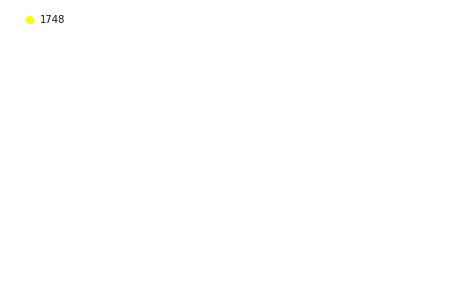

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [49]:
som3 = somoclu.Somoclu(n_columns, n_rows, gridtype="hexagonal",
                      compactsupport=False)
som3.train(data)
som3.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)

**Initialization with pca and clustering the results:** pass an inital codebook of our choice, but we can also ask Somoclu to initialize the codebook with vectors from the subspace spanned by the first two eigenvalues of the correlation matrix. 

In [50]:
som4.cluster()
som4.view_umatrix(bestmatches=True, bestmatchcolors=colors , labels=labels)

NameError: name 'som4' is not defined

In [51]:
normal_X = DataFrame(normal_X)

In [52]:
from sklearn.cluster import DBSCAN
algorithm = DBSCAN()
som5.cluster(algorithm=algorithm)
som5.view_umatrix(bestmatches=True,bestmatchcolors=colors, labels=labels)

NameError: name 'som5' is not defined

Evolving maps 

In [53]:
som6 = somoclu.Somoclu(n_columns, n_rows, maptype="toroid")
som6.train(data)
c2_shifted = c2 - 0.2
updated_data = np.float32(np.concatenate((c1, c2_shifted, c3)))

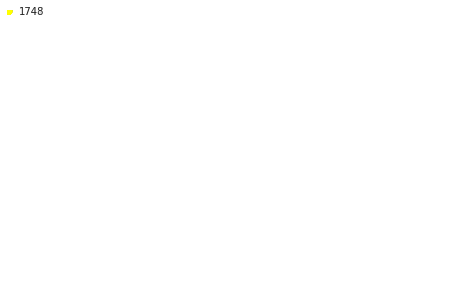

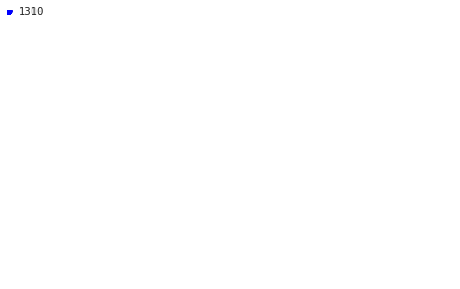

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [54]:
som6.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)
som6.update_data(updated_data)
som6.train(epochs=2, radius0=20, scale0=0.02)
som6.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)